### Import all required libraries

In [47]:
#Data Rendering
import numpy as np
import pandas as pd
import os
from pandas import Series, DataFrame

#visualization
import seaborn as sb
import matplotlib.pyplot  as plt
from pylab import rcParams

#Correlation libraries
import scipy 
from scipy.stats import spearmanr,chi2_contingency

#Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Setting for Matplotlib figure size

In [2]:
%matplotlib inline
rcParams['figure.figsize']=20,14
plt.style.use('seaborn-whitegrid')

### Load training and testing data

In [3]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\gender_submission.csv
data\test.csv
data\train.csv


In [4]:
train_address="data/train.csv"
test_address="data/test.csv"

train_DF=pd.read_csv(train_address)
test_DF=pd.read_csv(test_address)

combined_DF=[train_DF,test_DF]

In [5]:
train_DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_DF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Some questions before starting the data analysis process

- Which age group people survived more?
 > Age group between 20-40 survived 
- Which Pclass survived more and how many male and female in that group?
 > Pclass of 1 survived more compared to another classes
- Which Embarked people survived?
 > People of Embarked C i.e Cherbourg survived more.
- How SibSp and Parch are correlated?
 > Yes SibSp and Parch are correlated, this proved by using CHI-Square test

### Data Cleaning

In [7]:
train_DF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_DF.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
survial_count=train_DF['Survived'].value_counts()
survive=survial_count[1]/(survial_count[0]+survial_count[1])*100
print(f'Total % people survied were {survive:0.2f}')

Total % people survied were 38.38


We data of 891 people out of which 

Data is classified as shown below:
- Categorical Columns: Survived, Sex, Embarked
- Ordinal: Pclass
- Numeric Columns: Age, Fare
- MultiData: PassengerId, Name, Cabin
- Discrete: SibSp, Parch

Now we have to find out relation between all features and Survived

#### Which Sex people survived

- According to below observtions 74% Female survived whereas 18% Male Survived


Total % of people survied were 38.4% out of which 0.742% were female.Which means female survival rate was more. This shows that survival rate and sex are correlated.

In [10]:
train_DF[['Survived','Sex']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Which ticket class people survived more

- According to below analysis people of Pclass one survived 62% as compared to other class people.

In [11]:
train_DF[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_DF[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_DF[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [14]:
train_DF[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Now we will try to find out relation between Age and Survived
> So from below results we can say that people of age group 20-40 survived more.

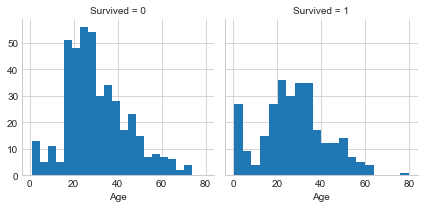

In [15]:
g = sb.FacetGrid(train_DF, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [16]:
train_DF['AgeBand'] = pd.cut(train_DF['Age'], 5)
train_DF[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


Remove columns that are not required
- PassengerId,Name,Ticket,Fare,Cabin,AgeBand

In [17]:
train_DF=train_DF.drop(['PassengerId','Name','Ticket','Fare','Cabin','AgeBand'],axis=1)
test_DF=test_DF.drop(['Name','Ticket','Fare','Cabin'],axis=1)
train_DF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [18]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


There are missing values in Age and Embarked Column.

So to fill missing values we will use:
- Missing age values will be filled by median of all Ages
- Missing Embarked values will be filled by median of Embarked feature.

In [19]:
frequent_embarked=train_DF['Embarked'].mode()[0]
frequent_embarked

'S'

In [20]:
#Fill NaN values of Embarked with 'S'
train_DF['Embarked']=train_DF["Embarked"].fillna(frequent_embarked)
#Fill NaN values of Age with 'median()'
train_DF['Age']=train_DF["Age"].fillna(train_DF['Age'].median())
##Fill NaN values of Age

test_DF['Embarked']=test_DF["Embarked"].fillna(frequent_embarked)
test_DF['Age']=test_DF["Age"].fillna(test_DF['Age'].median())

We will now one-hotencode features Sex, Embarked and Age

- Sex=> Male=0,female=1
- Embarked=> C=1,Q=2,S=3
- Age is binned and values assigned are:
  - 0-16=0
  - 16-32=1
  - 33-48=2
  - 49-64=3
  - above 64=4

In [21]:
title_mapping = {"male": 0, "female": 1, "C": 1, "Q": 2, "S": 3}
train_DF["Sex"]=train_DF["Sex"].map(title_mapping)
train_DF["Embarked"]=train_DF["Embarked"].map(title_mapping)
train_DF.loc[(train_DF['Age'] <= 16) , 'Age'] = 0
train_DF.loc[(train_DF['Age'] > 16) & (train_DF['Age'] <= 32), 'Age'] = 1
train_DF.loc[(train_DF['Age'] > 32) & (train_DF['Age'] <= 48), 'Age'] = 2
train_DF.loc[(train_DF['Age'] > 48) & (train_DF['Age'] <= 64), 'Age'] = 3
train_DF.loc[ train_DF['Age'] > 64, 'Age'] = 4 
test_DF["Sex"]=test_DF["Sex"].map(title_mapping)
test_DF["Embarked"]=test_DF["Embarked"].map(title_mapping)
test_DF.loc[(test_DF['Age'] <= 16) , 'Age'] = 0
test_DF.loc[(test_DF['Age'] > 16) & (test_DF['Age'] <= 32), 'Age'] = 1
test_DF.loc[(test_DF['Age'] > 32) & (test_DF['Age'] <= 48), 'Age'] = 2
test_DF.loc[(test_DF['Age'] > 48) & (test_DF['Age'] <= 64), 'Age'] = 3
test_DF.loc[ test_DF['Age'] > 64, 'Age'] = 4 
train_DF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1.0,1,0,3
1,1,1,1,2.0,1,0,1
2,1,3,1,1.0,0,0,3
3,1,1,1,2.0,1,0,3
4,0,3,0,2.0,0,0,3


In [22]:
train_DF['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Observations till now

- Data is now ready and in number format which is required by Machine Learning Model.
- Now we would perform some tests to check correlation between features.
- As our features contains ordinal values will be finding Spearman correlation

### Genrating Pairplot

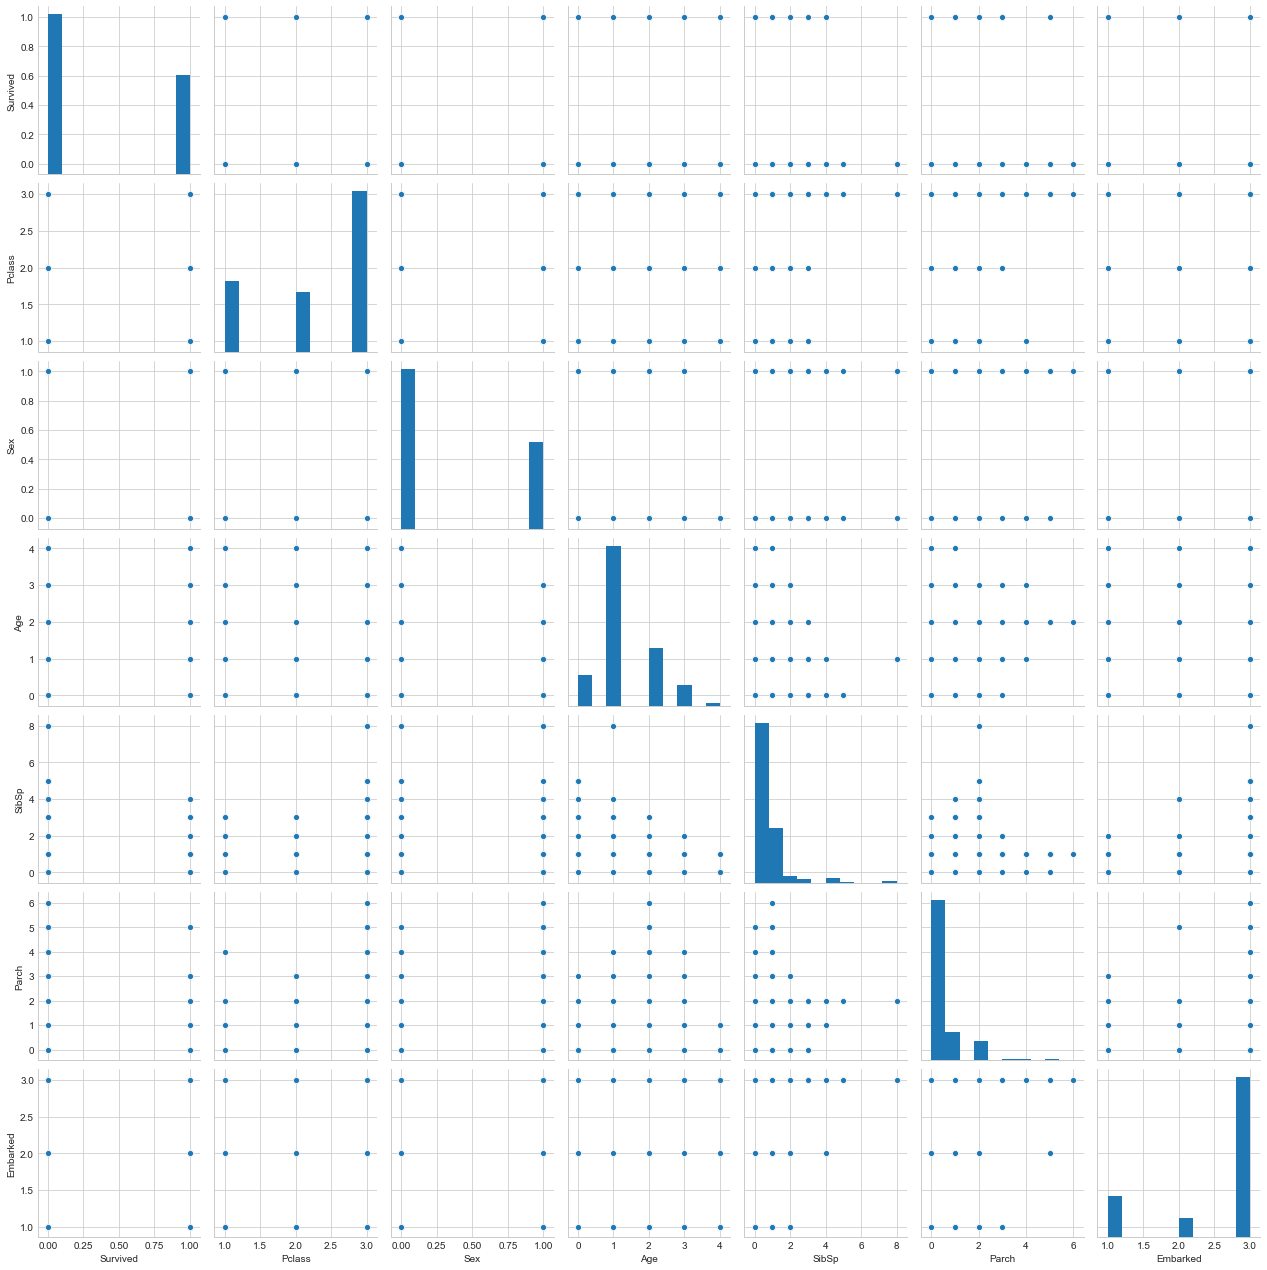

In [23]:
sb.pairplot(train_DF)

### Spearmans Rank Correlation

#### Spearman correlation:
- If p_value=1 => Strong positive correlation
- If p_value=0 => No Correlation
- If p_value=-1 => Strong negative correlation

#### CHI-SQUARE Test
- To find out weather our features are independent or not we perform CHI-SQUARE Test

#### Observations
- After performing spearman's rank correlation, we found out that all our feature Pclass,Sex,Age,SibSp,Parch, Embarked are not correlated.
- After performing CHI-SQAURE Test we found that Pclass,Sex,Age,SibSp,Embarked are correlated while Parch is independent

### Spearman's Rank Correlation

In [24]:
pclass=test_DF["Pclass"]
sex=test_DF["Sex"]
age=test_DF["Age"]
sibsp=test_DF["SibSp"]
parch=test_DF["Parch"]
embarked=test_DF["Embarked"]

spearmanr_coefficient,p_value= spearmanr(pclass,sex)
print(f'Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}')

Spearman Rank correlation coefficient -0.101


In [25]:
spearmanr_coefficient,p_value= spearmanr(pclass,age)
print(f'Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}')

Spearman Rank correlation coefficient -0.437


In [26]:
spearmanr_coefficient,p_value= spearmanr(pclass,sibsp)
print(f'Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}')

Spearman Rank correlation coefficient -0.119


In [27]:
spearmanr_coefficient,p_value= spearmanr(pclass,parch)
print(f'Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}')

Spearman Rank correlation coefficient -0.043


In [28]:
spearmanr_coefficient,p_value= spearmanr(pclass,embarked)
print(f'Spearman Rank correlation coefficient {spearmanr_coefficient:0.3f}')

Spearman Rank correlation coefficient 0.162


### CHI-SQUARE Test

In [29]:
table= pd.crosstab(pclass,sex)
chi2,p,dof,expected= chi2_contingency(table.values)
print(f'Chi-square statistic {chi2:0.3f} p_value{p:0.3f}')

Chi-square statistic 6.694 p_value0.035


In [30]:
table= pd.crosstab(pclass,age)
chi2,p,dof,expected= chi2_contingency(table.values)
print(f'Chi-square statistic {chi2:0.3f} p_value{p:0.3f}')

Chi-square statistic 105.537 p_value0.000


In [31]:
table= pd.crosstab(pclass,sibsp)
chi2,p,dof,expected= chi2_contingency(table.values)
print(f'Chi-square statistic {chi2:0.3f} p_value{p:0.3f}')

Chi-square statistic 22.673 p_value0.031


In [32]:
table= pd.crosstab(pclass,parch)
chi2,p,dof,expected= chi2_contingency(table.values)
print(f'Chi-square statistic {chi2:0.3f} p_value{p:0.3f}')

Chi-square statistic 13.117 p_value0.517


In [33]:
table= pd.crosstab(pclass,embarked)
chi2,p,dof,expected= chi2_contingency(table.values)
print(f'Chi-square statistic {chi2:0.3f} p_value{p:0.3f}')

Chi-square statistic 82.832 p_value0.000


### Separating Train and Test Feature

In [34]:
train_DF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1.0,1,0,3
1,1,1,1,2.0,1,0,1
2,1,3,1,1.0,0,0,3
3,1,1,1,2.0,1,0,3
4,0,3,0,2.0,0,0,3


### Machine Learning Algorithms

### Splitting data in train and test set

In [37]:
X_train = train_DF.drop("Survived", axis=1)
Y_train = train_DF["Survived"]
X_test  = test_DF.drop(['PassengerId'],axis=1).copy()

### Creating Models

### LogisticRegression Model

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_log = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.57

### Support Vector Classifier

In [39]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.49

### KNeighborsClassifier Model

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.73

### Decision Tree Model

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_decision = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.31

### Random Forest Model

In [42]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_random = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.31

In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',  
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.31
4,Decision Tree,86.31
1,KNN,83.73
0,Support Vector Machines,82.49
2,Logistic Regression,79.57


### Conclusion

- After using various alogirthm, Random Forest and Decison Tree gave same accuracy score, we could be using Random Forest model with score of 86.31%

In [46]:
submission_df=pd.DataFrame({
    "PassengerId": test_DF["PassengerId"],
    "Survived": Y_pred_random
})
submission_df.to_csv('./submission.csv', index=False)

### References

- I have used below notebooks for reference, it helped me alot. 
    - https://www.kaggle.com/startupsci/titanic-data-science-solutions
    - https://www.kaggle.com/amarkumar2/titanic-predection-easy-solution

Please be free to give your suggestions in comment section, and show your support by upvoting.

P.S: This is my first competition and I am open for feedback and connection.